02 - Data synthetization (SMOTE)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [10]:
# all data numeric
df = pd.read_csv("bank_numeric.csv")

In [11]:
# Display original class distribution
print("Original class distribution:")
print(df['deposit'].value_counts())

Original class distribution:
0    3144
1    2113
Name: deposit, dtype: int64


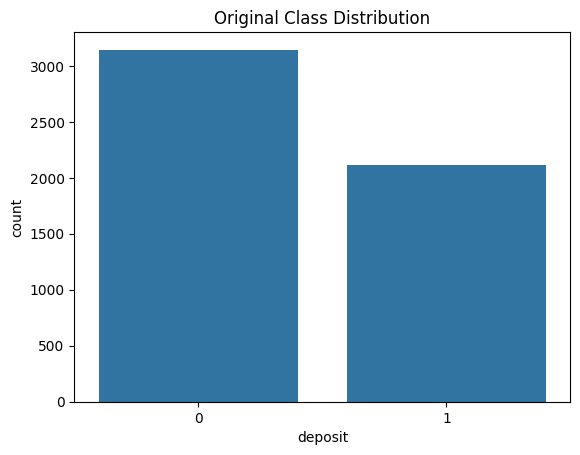

In [12]:
# Visualize original distribution
sns.countplot(x='deposit', data=df)
plt.title('Original Class Distribution')
plt.show()

In [13]:
# Separate features and target
X = df.drop('deposit', axis=1)
y = df['deposit']

In [14]:
# Apply SMOTE to the dataset
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [15]:
# Combine resampled features and target into a new DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['deposit'] = y_resampled

In [ ]:
# Display new class distribution
print("New class distribution after SMOTE:")
print(df_resampled['deposit'].value_counts())

# now we have the same amount of data for each category for the raget variable

New class distribution after SMOTE:
1    3144
0    3144
Name: deposit, dtype: int64


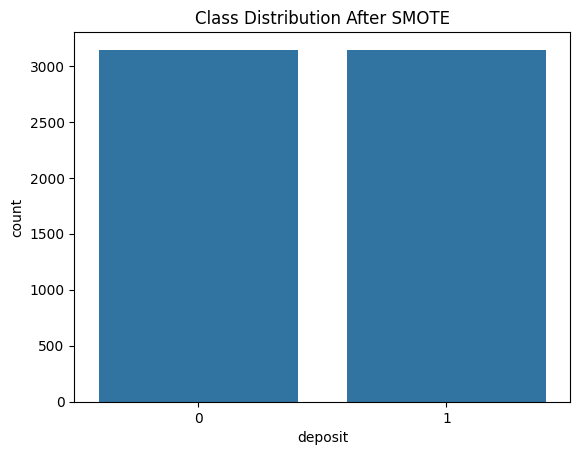

In [17]:
# Visualize new distribution
sns.countplot(x='deposit', data=df_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_resampled.duplicated().sum()

# and only 1 duplicate! this is good

1

In [20]:
df.corr()['deposit']

age         -0.073356
job          0.022639
marital      0.076330
education    0.105812
default     -0.026915
balance      0.110684
housing     -0.146347
loan        -0.081519
contact     -0.236888
day         -0.080099
month       -0.000741
duration     0.515548
campaign    -0.105031
pdays        0.239531
previous     0.252384
poutcome    -0.287127
deposit      1.000000
Name: deposit, dtype: float64

In [22]:
 df_resampled.corr()['deposit']

# suprisingly, the correlation metrics changed a lot
# after utilizing SMOTE

age         -0.091308
job          0.004910
marital      0.005560
education    0.046365
default     -0.050499
balance      0.112632
housing     -0.225300
loan        -0.134561
contact     -0.284514
day         -0.090038
month       -0.041667
duration     0.492908
campaign    -0.134677
pdays        0.224499
previous     0.232129
poutcome    -0.276328
deposit      1.000000
Name: deposit, dtype: float64